# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/guruprasadmulay/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [5]:
# Create a newsapi client
from newsapi import NewsApiClient

newsapi = NewsApiClient(api_key=api_key)

In [7]:
#Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(
    q="bitcoin",
)
btc_news["totalResults"]

13805

In [8]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(
    q="ethereum",
)

In [10]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiment = []

for article in btc_news["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article['description'])
        title = article["title"]
        description = article["description"]
        text = article["content"]
        date = article["publishedAt"]
      
        btc_sentiment.append({
            "Title": title,
            "Description": description,
            "Text": text,
            "Date": date,
            "Compound": sentiment["compound"],
            "Positive": sentiment["pos"],
            "Negative": sentiment["neg"],
            "Neutral": sentiment["neu"]
            
        })
        
    except AttributeError:
        pass
btc_df = pd.DataFrame(btc_sentiment)
btc_df

,Title,Description,Text,Date,Compound,Positive,Negative,Neutral
0,Miami’s Bitcoin Conference Left a Trail of Har...,"For some women, inappropriate conduct from oth...","Now, even though there are a number of women-f...",2022-05-10T16:59:46Z,-0.4019,0.000,0.184,0.816
1,Why fossil fuel companies see green in Bitcoin...,ExxonMobil and other fossil fuel companies hav...,A Bitcoin mining site powered by otherwise los...,2022-05-04T12:00:00Z,-0.5423,0.000,0.191,0.809
2,Warren Buffett Says He Wouldn't Take All the B...,Warren Buffett has always been a bitcoin skept...,Warren Buffett has always been a bitcoin skept...,2022-05-02T11:30:00Z,-0.3269,0.069,0.117,0.814
3,Bitcoin value drops by 50% since November peak,The slide in the value of cryptocurrencies com...,"Image source, Getty Images\r\nThe value of Bit...",2022-05-09T03:04:37Z,-0.0258,0.121,0.126,0.754
4,Fidelity Wants to Include Bitcoin in 401(k) Pl...,The nation's largest retirement plan provider ...,If youve ever felt like introducing some Vegas...,2022-05-05T18:10:00Z,0.0000,0.000,0.000,1.000
5,US Treasury issues first-ever sanctions agains...,Cryptocurrency mixers are sometimes used to he...,Cryptocurrency mixers are sometimes used to he...,2022-05-06T20:35:02Z,-0.4404,0.177,0.211,0.613
6,"Bitcoin, Ethereum Technical Analysis: BTC Slip...","<ol><li>Bitcoin, Ethereum Technical Analysis: ...","BTC fell to its lowest level since last July, ...",2022-05-09T13:45:30Z,-0.7506,0.000,0.183,0.817
7,Bitcoin last down 5.1% at $38391.36 - Reuters.com,"Bitcoin dropped 5.1% to $38,391.36 on Tuesday,...",April 26 (Reuters) - Bitcoin dropped 5.1% to $...,2022-04-26T20:22:00Z,0.0000,0.000,0.000,1.000
8,Bitcoin last up 5.7% at $39862.84 - Reuters.com,"Bitcoin rose 5.7% to $39,862.84, on Wednesday,...","May 4 (Reuters) - Bitcoin rose 5.7% to $39,862...",2022-05-04T20:16:00Z,0.0000,0.000,0.000,1.000
9,Cryptoverse: rising interest hurts Bitcoin - R...,From Bitcoin's dramatic drop to a new way to p...,Posted \r\nFrom Bitcoin's dramatic drop to a n...,2022-05-10T18:29:04Z,-0.3612,0.000,0.127,0.873


In [11]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiment = []

for article in eth_news["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article['description'])
        title = article["title"]
        description = article["description"]
        text = article["content"]
        date = article["publishedAt"]
      
        eth_sentiment.append({
            "Title": title,
            "Description": description,
            "Text": text,
            "Date": date,
            "Compound": sentiment["compound"],
            "Positive": sentiment["pos"],
            "Negative": sentiment["neg"],
            "Neutral": sentiment["neu"]
            
        })
        
    except AttributeError:
        pass
    
# Create dataframe
eth_df = pd.DataFrame(eth_sentiment)

In [12]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.119680,0.055200,0.101350,0.843500
std,0.381047,0.067945,0.095257,0.104645
min,-0.750600,0.000000,0.000000,0.613000
25%,-0.386825,0.000000,0.000000,0.800500
50%,-0.101850,0.000000,0.106000,0.843000
75%,0.152575,0.115000,0.156750,0.899000
max,0.571900,0.177000,0.351000,1.000000


In [13]:
# Describe the Ethereum Sentiment
eth_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.098135,0.054800,0.085100,0.860050
std,0.468161,0.071567,0.083457,0.076007
min,-0.855500,0.000000,0.000000,0.739000
25%,-0.381800,0.000000,0.000000,0.821500
50%,-0.126950,0.000000,0.062500,0.851000
75%,0.266600,0.109250,0.148000,0.898250
max,0.778300,0.212000,0.261000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

ETH

Q: Which coin had the highest compound score?

ETH

Q. Which coin had the highest positive score?

ETH

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [14]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [16]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))
# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [21]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""

    sw = set(stopwords.words('english'))

    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', str(text))
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)  

    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]

   
    # Convert the words to lowercase
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens

In [22]:
# Create a new tokens column for Bitcoin
btc_df['Tokens'] = btc_df['Text'].apply(tokenizer)
btc_df.head()

,Title,Description,Text,Date,Compound,Positive,Negative,Neutral,Tokens
0,Miami’s Bitcoin Conference Left a Trail of Har...,"For some women, inappropriate conduct from oth...","Now, even though there are a number of women-f...",2022-05-10T16:59:46Z,-0.4019,0.000,0.184,0.816,"[even, though, number, womenfocused, crypto, s..."
1,Why fossil fuel companies see green in Bitcoin...,ExxonMobil and other fossil fuel companies hav...,A Bitcoin mining site powered by otherwise los...,2022-05-04T12:00:00Z,-0.5423,0.000,0.191,0.809,"[bitcoin, mining, site, powered, otherwise, lo..."
2,Warren Buffett Says He Wouldn't Take All the B...,Warren Buffett has always been a bitcoin skept...,Warren Buffett has always been a bitcoin skept...,2022-05-02T11:30:00Z,-0.3269,0.069,0.117,0.814,"[warren, buffett, ha, always, bitcoin, skeptic..."
3,Bitcoin value drops by 50% since November peak,The slide in the value of cryptocurrencies com...,"Image source, Getty Images\r\nThe value of Bit...",2022-05-09T03:04:37Z,-0.0258,0.121,0.126,0.754,"[image, source, getty, imagesthe, value, bitco..."
4,Fidelity Wants to Include Bitcoin in 401(k) Pl...,The nation's largest retirement plan provider ...,If youve ever felt like introducing some Vegas...,2022-05-05T18:10:00Z,0.0000,0.000,0.000,1.000,"[youve, ever, felt, like, introducing, vegasst..."


In [23]:
# Create a new tokens column for Ethereum
eth_df['Tokens'] = eth_df['Text'].apply(tokenizer)
eth_df.head()


,Title,Description,Text,Date,Compound,Positive,Negative,Neutral,Tokens
0,Here's what NFTs look like on Instagram,Meta has revealed more of how NFTs will work o...,Meta has revealed more of how NFTs will work o...,2022-05-10T13:10:20Z,0.7783,0.154,0.000,0.846,"[meta, ha, revealed, nfts, work, instagram, us..."
1,Opera's crypto browser is now available on iOS,"Opera launched its dedicated ""Crypto Browser"" ...","Opera launched its dedicated ""Crypto Browser"" ...",2022-04-15T11:37:13Z,0.4767,0.113,0.000,0.887,"[opera, launched, dedicated, crypto, browser, ..."
2,Yuga Labs apologises after sale of virtual lan...,Demand for plots of land in multiplayer game O...,A multi-billion dollar cryptocurrency company ...,2022-05-02T15:54:35Z,-0.2350,0.070,0.093,0.836,"[multibillion, dollar, cryptocurrency, company..."
3,How Bored Ape Yacht Club Broke Ethereum - CNET,"Transactions stalled for hours, and people pai...",When Bored Ape Yacht Club creators Yuga Labs a...,2022-05-04T02:32:00Z,0.2500,0.151,0.097,0.753,"[bored, ape, yacht, club, creator, yuga, labs,..."
4,Cryptoverse: Ether prepares for epic 'merge' i...,Ether has promised to do better. It has promis...,April 26 (Reuters) - Ether has promised to do ...,2022-04-26T05:15:00Z,0.5346,0.173,0.000,0.827,"[april, reuters, ether, ha, promised, better, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [28]:
from collections import Counter
from nltk import ngrams

In [29]:
# Generate the Bitcoin N-grams where N=2
btc_bg_counts = [Counter(ngrams(tokens, n=2)) for tokens in btc_df.Tokens]
dict(btc_bg_counts[0].most_common(10))

{('even', 'though'): 1,
 ('though', 'number'): 1,
 ('number', 'womenfocused'): 1,
 ('womenfocused', 'crypto'): 1,
 ('crypto', 'space'): 1,
 ('space', 'odeniran'): 1,
 ('odeniran', 'say'): 1,
 ('say', 'woman'): 1,
 ('woman', 'still'): 1,
 ('still', 'underrepresented'): 1}

In [30]:
# Generate the Ethereum N-grams where N=2
eth_bg_counts = [Counter(ngrams(tokens, n=2)) for tokens in eth_df.Tokens]
dict(eth_bg_counts[0].most_common(10))


{('meta', 'ha'): 1,
 ('ha', 'revealed'): 1,
 ('revealed', 'nfts'): 1,
 ('nfts', 'work'): 1,
 ('work', 'instagram'): 1,
 ('instagram', 'usbased'): 1,
 ('usbased', 'test'): 1,
 ('test', 'show'): 1,
 ('show', 'youve'): 1,
 ('youve', 'bought'): 1}

In [31]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [51]:
# Use token_count to get the top 10 words for Bitcoin
all_tokens = []
for tokens in btc_df.Tokens:
    all_tokens += tokens
token_count(all_tokens)

[('char', 19), ('bitcoin', 12), ('cryptocurrency', 12)]

In [50]:
# Use token_count to get the top 10 words for Ethereum
all_tokens = []
for tokens in eth_df.Tokens:
    all_tokens += tokens
token_count(all_tokens)

[('char', 20), ('cryptocurrency', 8), ('bitcoin', 7)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

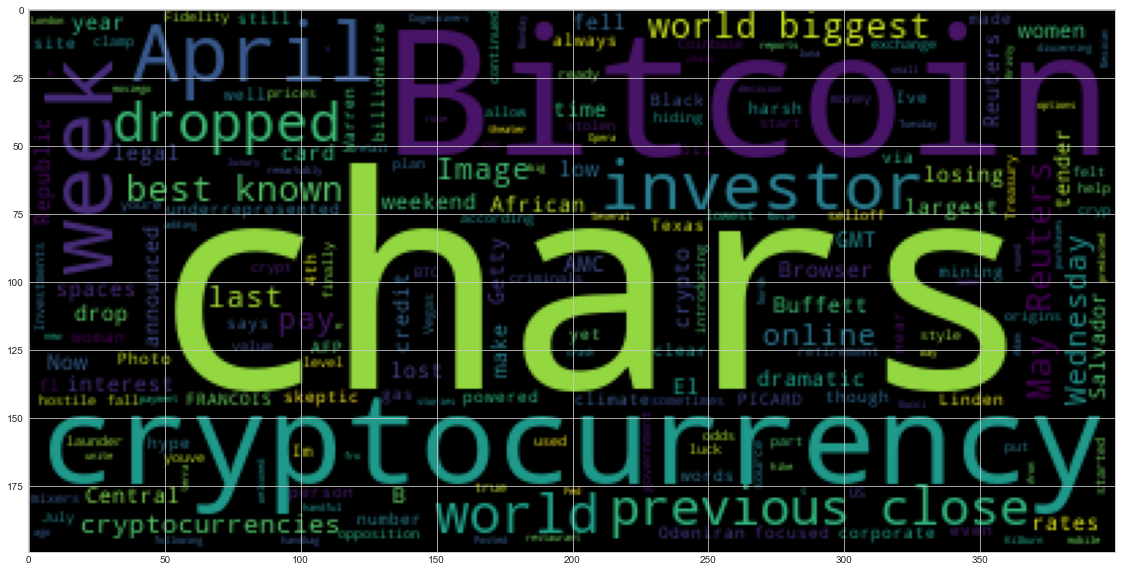

In [38]:
# Generate the Bitcoin word cloud
bitcoin_text = ' '.join(btc_df.Text)
wc = WordCloud().generate(bitcoin_text)
plt.imshow(wc)

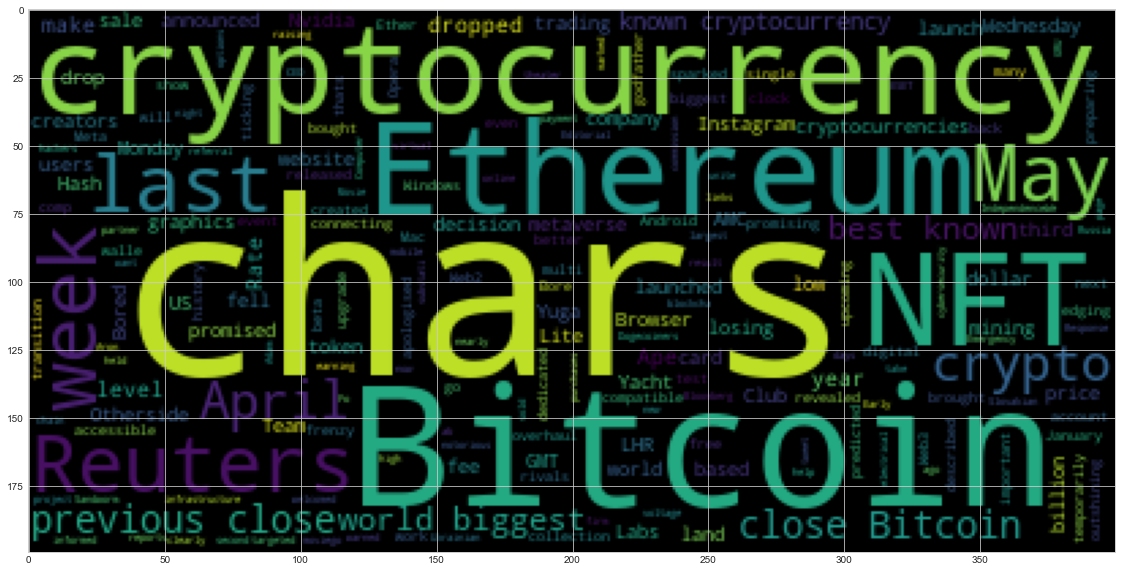

In [39]:
# Generate the Ethereum word cloud
ethereum_text = ' '.join(eth_df.Text)
wc = WordCloud().generate(ethereum_text)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [40]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [41]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [42]:
# Concatenate all of the Bitcoin text together
bitcoin_text = ' '.join(btc_df.Text)


In [43]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(bitcoin_text)

# Add a title to the document
bitcoin_doc.user_data["title"] = "Bitcoin NER"

In [44]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent')


In [45]:
# List all Entities
for ent in bitcoin_doc.ents:
    print(ent.text + ' ' + ent.label_)

Odeniran GPE
Linden GPE
Texas GPE
April 4th DATE
2022 DATE
FRANCOIS PICARD/AFP ORG
Getty Images ORG
Warren Buffett PERSON
the weekend DATE
Buffett PERSON
Getty Images ORG
the weekend DATE
34,000 MONEY
27,630 MONEY
Coinbase PERSON
Last week DATE
Fidelity Investments ORG
the US Treasury ORG
last July DATE
33,000 MONEY
the week DATE
last week DATE
Fed ORG
April 26 DATE
Reuters ORG
5.1% PERCENT
38,391.36 MONEY
Tuesday DATE
2,229.82 MONEY
Bitcoin PERSON
16% PERCENT
year DATE
+339 ORG
May 4 DATE
Reuters ORG
5.7% PERCENT
39,862.84 MONEY
Wednesday DATE
2,102.94 MONEY
Bitcoin PERSON
20.9% PERCENT
year DATE
Bitcoin PERSON
Gucci PERSON
week DATE
Kristy Kilburn PERSON
May 11 DATE
Reuters ORG
7.23% PERCENT
28,758.29 MONEY
22:05 GMT TIME
Wednesday DATE
2,241.68 MONEY
Bitcoin PERSON
40.4% PERCENT
+361 CARDINAL
May 9 DATE
Reuters ORG
7.81% PERCENT
31,333.41 MONEY
Monday DATE
2,655.98 MONEY
Bitcoin PERSON
35% PERCENT
AMC ORG
April 15 DATE
AMC ORG
Adam Aron PERSON
moviego GPE
Mexican NORP
North London G

---

### Ethereum NER

In [46]:
# Concatenate all of the Ethereum text together
ethereum_text = ' '.join(eth_df.Text)


In [47]:

# Run the NER processor on all of the text
ethereum_doc = nlp(ethereum_text)

# Add a title to the document
ethereum_doc.user_data["title"] = "Ethereum NER"

In [48]:
# Render the visualization
displacy.render(ethereum_doc, style='ent')


In [49]:
# List all Entities
for ent in ethereum_doc.ents:
    print(ent.text + ' ' + ent.label_)

Meta ORG
Instagram ORG
US GPE
Instagram ORG
Crypto Browser PERSON
January DATE
Windows, Mac ORG
Android ORG
Ethereum ORG
Yuga Labs PERSON
Bored Ape Yacht Club PERSON
Yuga Labs PERSON
Otherside ORG
April 30 DATE
NFT ORG
April 26 DATE
Reuters ORG
No.2 DATE
second ORDINAL
AMC ORG
April 15 DATE
AMC ORG
Adam Aron PERSON
moviego GPE
the "Bored Apes Yacht Club LAW
Last night TIME
Bloomberg PERSON
nearly a third CARDINAL
a billion dollars MONEY
Early this week DATE
the Ukrainian Computer Emergency Response Team ORG
Slovakian NORP
Russia GPE
GRU Sandworm PERSON
40 days ago DATE
47,454 MONEY
34,007 MONEY
28%.About a third CARDINAL
this week DATE
Nvidia PERSON
Ethereum ORG
April 26 DATE
Reuters ORG
5.1% PERCENT
38,391.36 MONEY
Tuesday DATE
2,229.82 MONEY
Bitcoin PERSON
16% PERCENT
year DATE
+339 ORG
May 4 DATE
Reuters ORG
5.7% PERCENT
39,862.84 MONEY
Wednesday DATE
2,102.94 MONEY
Bitcoin PERSON
20.9% PERCENT
year DATE
May 11 DATE
Reuters ORG
7.23% PERCENT
28,758.29 MONEY
22:05 GMT TIME
Wednesday 

---